# Part-2 Create the Data Set

# 2.1 Matrix

In [28]:
# create a matrix
vector <- 1:12
rnames <- c('r1', 'r2', 'r3')
cnames <- c('c1', 'c2', 'c3', 'c4')
matrix_1 <- matrix(vector, ncol=4, byrow=T,
                   dimnames=list(rnames, cnames))
matrix_1

,c1,c2,c3,c4
r1,1,2,3,4
r2,5,6,7,8
r3,9,10,11,12


### byrow=T means the matrix is filled by row first

In [29]:
matrix_1[,1]
matrix_1[2, c(1,2,3)]

r1 r2 r3 
 1  5  9

c1 c2 c3 
 5  6  7

# 2.2 Array

In [26]:
# create an array
dim1 <- c('a1', 'a2')
dim2 <- c('b1', 'b2', 'b3')
dim3 <- c('d1', 'd2', 'd3', 'd4')
array_1 <- array(1:24, c(2, 3, 4), 
                 dimnames=list(dim1, dim2, dim3))

### the code above is true but it can't be presented exactly here

In [27]:
array_1[1,2,3]

[1] 15

# 2.3 Dataframe

In [25]:
# create a dataframe
patientID <- c(1, 2, 3, 4)
age <- c(25, 34, 28, 52)
diabetes <- c('Type1', 'Type2', 'Type1', 'Type1')
status <- c('Poor', 'Improved', 'Excellent', 'Poor')
patientdata <- data.frame(patientID, age, diabetes, status)
patientdata

patientID,age,diabetes,status
1,25,Type1,Poor
2,34,Type2,Improved
3,28,Type1,Excellent
4,52,Type1,Poor


In [31]:
# extract some colums in dataframe
patientdata[c('age', 'status')]
patientdata$diabetes      # symbol $ is helpful in one colum
patientdata[c('diabetes')]

age,status
25,Poor
34,Improved
28,Excellent
52,Poor


[1] Type1 Type2 Type1 Type1
Levels: Type1 Type2

diabetes
Type1
Type2
Type1
Type1


The following objects are masked _by_ .GlobalEnv:

    age, diabetes, patientID, status

The following objects are masked from patientdata (pos = 3):

    age, diabetes, patientID, status



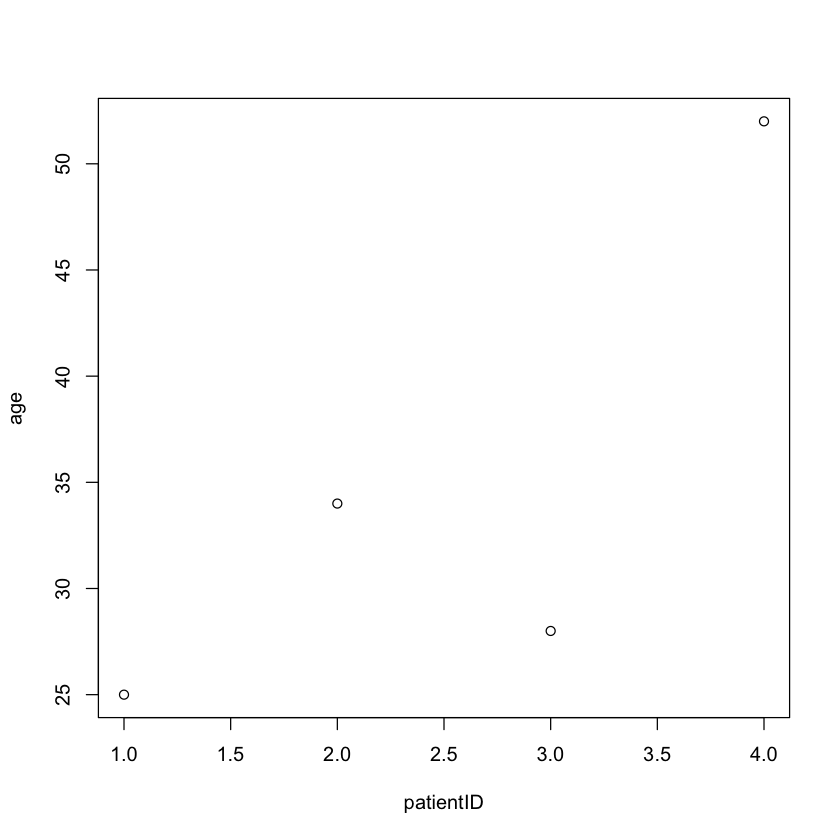

In [35]:
# a same method of extracting colums
attach(patientdata)

plot(patientID, age)

detach(patientdata)

### the warning arises because we've already created vectors with the same name :patientID, age, diabetes & status

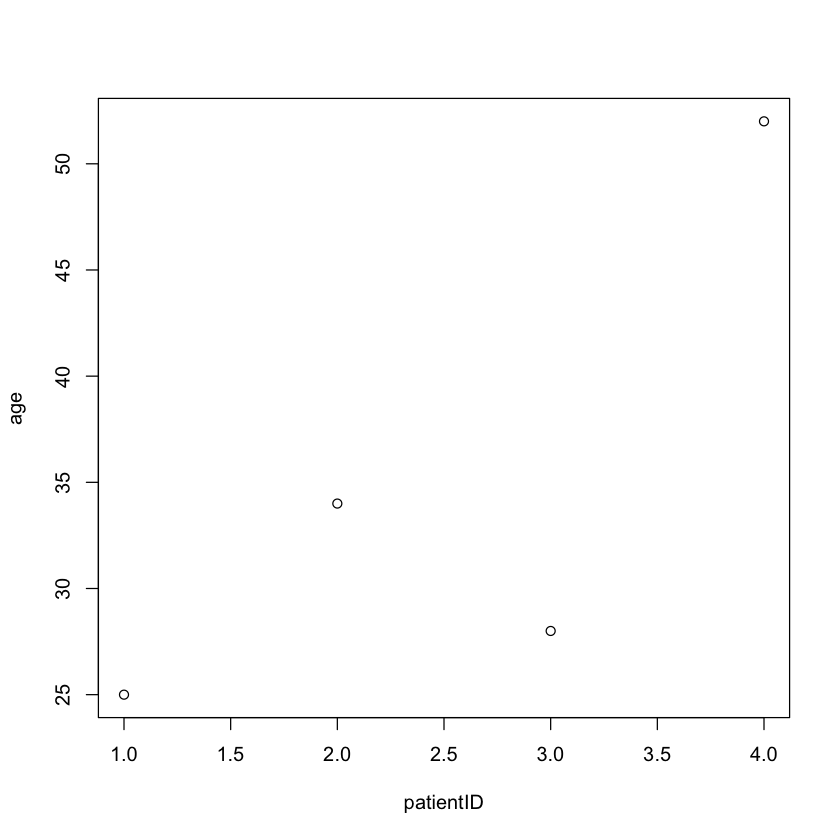

In [39]:
# a more stable method instead
with(patientdata, {
    summary(age)
    plot(patientID, age)
})

### notice that all the codes are valid within the {}  except <<-

In [41]:
# <<- can be also valid outside the with() function
with(patientdata, {
    not_valid <- age
    valid <<- age
})
valid
not_valid

[1] 25 34 28 52

ERROR: Error in eval(expr, envir, enclos): 找不到对象'not_valid'


In [32]:
# create a table
table(patientdata$diabetes, patientdata$status)

       
        Excellent Improved Poor
  Type1         1        0    2
  Type2         0        1    0

### the content and utility of ‘table’ haven't been discussed yet

In [47]:
# case identifier
patientdata_id <- data.frame(patientID, 
                age, diabetes, status, row.names=patientID)
patientdata_id

patientID,age,diabetes,status
1,25,Type1,Poor
2,34,Type2,Improved
3,28,Type1,Excellent
4,52,Type1,Poor


In [50]:
# the factor()
diabetes_f <- factor(diabetes)      # unoredered catogories
status_f <- factor(status, order=T) # oredered catogories
status_f2 <- factor(status, order=T,
                    levels=c('Poor', 'Improved', 'Excellent'))
                                    # design the order youself

In [51]:
# the example
patientdata_f <- data.frame(patientID, age, 
                            diabetes_f, status_f)
str(patientdata_f)

'data.frame':	4 obs. of  4 variables:
 $ patientID : num  1 2 3 4
 $ age       : num  25 34 28 52
 $ diabetes_f: Factor w/ 2 levels "Type1","Type2": 1 2 1 1
 $ status_f  : Ord.factor w/ 3 levels "Excellent"<"Improved"<..: 3 2 1 3


In [52]:
summary(patientdata_f)

   patientID         age        diabetes_f      status_f
 Min.   :1.00   Min.   :25.00   Type1:3    Excellent:1  
 1st Qu.:1.75   1st Qu.:27.25   Type2:1    Improved :1  
 Median :2.50   Median :31.00              Poor     :2  
 Mean   :2.50   Mean   :34.75                           
 3rd Qu.:3.25   3rd Qu.:38.50                           
 Max.   :4.00   Max.   :52.00                           

# 2.4 List

In [53]:
# create a list
g <- 'my first list'
h <- c(25, 26, 18, 19)
j <- matrix(1:10, nrow=5)
k <- c('one', 'two', 'three')
list_01 <- list(title=g, ages=h, j, k)
list_01

$title
[1] "my first list"

$ages
[1] 25 26 18 19

[[3]]
     [,1] [,2]
[1,]    1    6
[2,]    2    7
[3,]    3    8
[4,]    4    9
[5,]    5   10

[[4]]
[1] "one"   "two"   "three"


In [54]:
list_01[[2]]
list_01[['ages']]

[1] 25 26 18 19

[1] 25 26 18 19

### list is so important because many functions return a list

# 2.5 Ways to import data

In [58]:
# get data from your keyboard
mydata_1 <- data.frame(age=numeric(0), 
                       gender=character(0), 
                       weight=numeric(0))
# mydata_1 <- edit(mydata_1)
# edit is not surported in jupyter(only in windows)

In [59]:
# get data from a file like txt
# grades <- read.table('studentgrades.txt', 
#                       headers=T, sep=',', 
#                       row.names='student')

### normally, all strings will be transferred to factors, 
### stringsAsFactors = F will cover this problem.

### or even you can assign every col a class through 'colClasses'

## ***more information please refer to 'R in Action' Part 2.3

In [61]:
# value label
# xx <- factor(vector, levels=c(1, 2), labels=c('a', 'b'))

# 2.6 Common functions

In [62]:
ex_1 <- c(1:10)
ex_2 <- matrix(ex_1, ncol=2)

In [63]:
length(ex_1)

[1] 10

In [64]:
dim(ex_2)

[1] 5 2

In [66]:
str(ex_1)

 int [1:10] 1 2 3 4 5 6 7 8 9 10


In [67]:
class(ex_2)

[1] "matrix"

In [71]:
mode(ex_1);mode(status)

[1] "numeric"

[1] "character"

In [74]:
names(patientdata)

[1] "patientID" "age"       "diabetes"  "status"

In [76]:
cbind(ex_1[1:4], age)

,age
1,25
2,34
3,28
4,52


In [77]:
rbind(ex_1[1:4], age)

,1,2,3,4
age,25,34,28,52


In [79]:
# Object(ex_1)

In [1]:
# head(), tail() is quite efficient dealing with big data
# they are used to take a look at first/last 6 lines

In [84]:
ls()

[1] "age"            "array_1"        "cnames"         "diabetes"      
 [5] "diabetes_f"     "dim1"           "dim2"           "dim3"          
 [9] "ex_1"           "ex_2"           "g"              "h"             
[13] "j"              "k"              "list_01"        "lnames"        
[17] "matrix_1"       "mydata_1"       "patientdata"    "patientdata_f" 
[21] "patientdata_id" "patientID"      "rnames"         "status"        
[25] "status_f"       "status_f2"      "valid"          "vector"

In [87]:
aaa <- 1
aaa
rm(aaa)
aaa

[1] 1

ERROR: Error in eval(expr, envir, enclos): 找不到对象'aaa'


In [89]:
# y <- edit(y) == fix(y)